In [1]:
import pandas as pd

In [2]:
import numpy as np

## Leer datos

In [3]:
df = pd.read_excel("Precios Brendt 2024-10.xls",sheet_name='Datos a Utilizar')

In [4]:
df = df.drop(df.index[0])

In [5]:
df.columns = ['Day', 'Price']

In [55]:
df.iloc[-1]

Day                      2024-01-29 00:00:00
Price                                  83.99
Retornos logaritmicos               0.007769
Name: 2541, dtype: object

## Retornos logaritmicos

In [6]:
df['Retornos logaritmicos'] = np.log(df['Price'] / df['Price'].shift(1))

## Media diaria

In [7]:
daily_avg = df['Retornos logaritmicos'].mean()

In [8]:
daily_avg

-0.00010200365652379218

## Volatilidad diaria

In [9]:
daily_vol = df['Retornos logaritmicos'].std()

In [10]:
daily_vol

0.031101540033155576

## Movimiento browniano geometrico
$
S_t = S_{t-1}e^{r+\sigma \epsilon_t}
$

### a)

In [14]:
last_price = df['Price'].iloc[-1]  # Get the last price from your DataFrame

num_simulations = 25
num_days = 100

In [16]:
# Initialize an array to store the simulation results
# Rows represent days, columns represent different simulations
simulation_results = np.zeros((num_days, num_simulations))

In [23]:
# Populate the first row with the last price, as all simulations start from the last observed price
simulation_results[0, :] = last_price

In [ ]:
# Simulate GBM for each simulation path
for i in range(1, num_days):
    random_shocks = np.random.normal(0, 1, num_simulations)
    simulation_results[i, :] = simulation_results[i-1, :] * np.exp(daily_avg + daily_vol * random_shocks)

In [ ]:
# Convert the simulation results to a DataFrame for easier handling
simulation_df = pd.DataFrame(simulation_results)

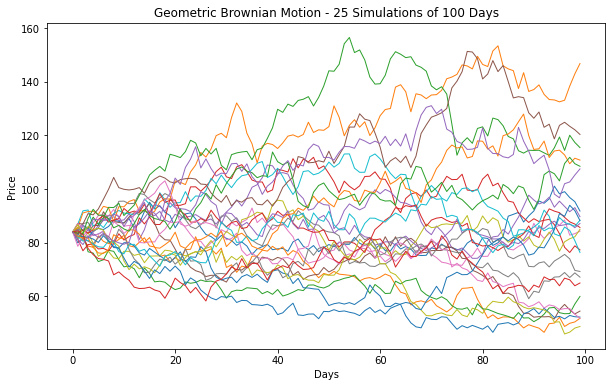

In [34]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulation_df[i], lw=1)
plt.title('Geometric Brownian Motion - 25 Simulations of 100 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

### b)

In [43]:
num_days = 100
num_simulations = 1000

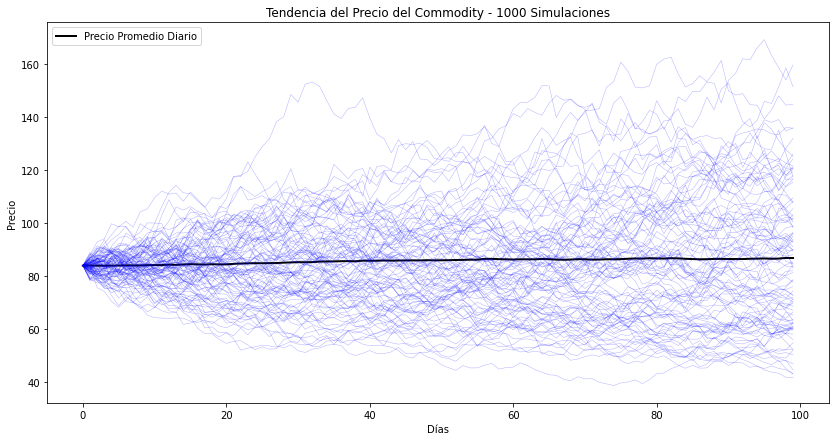

In [44]:
# Array para almacenar las simulaciones
simulation_results = np.zeros((num_days, num_simulations))

# Inicializar la primera fila con el último precio
simulation_results[0, :] = last_price

# Generar las simulaciones
for day in range(1, num_days):
    random_shocks = np.random.normal(daily_avg, daily_vol, num_simulations)
    simulation_results[day, :] = simulation_results[day - 1, :] * np.exp(random_shocks)

# Calcular el precio promedio diario
average_prices = simulation_results.mean(axis=1)

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(average_prices, label='Precio Promedio Diario', color='black', lw=2)

# Opcionalmente, graficar algunas simulaciones individuales
for i in range(1000):  # Cambiar a un número menor si desea menos curvas en el gráfico
    if i % 10 == 0:  # Graficar cada 10 simulaciones para no sobrecargar el gráfico
        plt.plot(simulation_results[:, i], color='blue', lw=0.5, alpha=0.3)

plt.title('Tendencia del Precio del Commodity - 1000 Simulaciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.legend()
plt.show()

### c)

In [45]:
num_days = 252
num_simulations = 1000

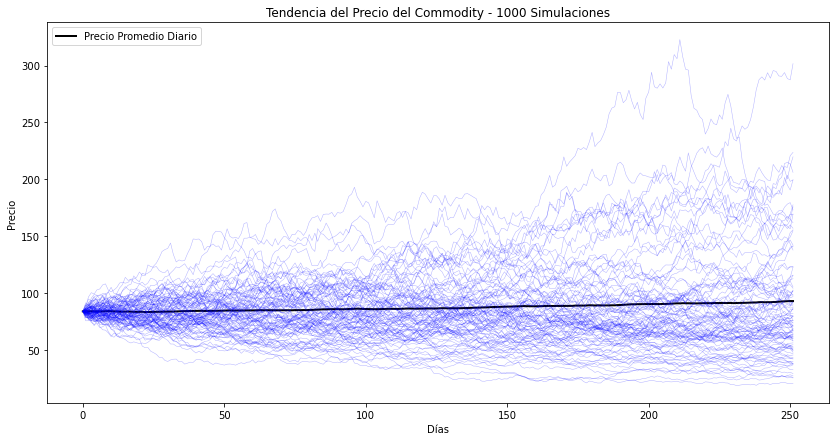

In [49]:
# Array para almacenar las simulaciones
simulation_results = np.zeros((num_days, num_simulations))

# Inicializar la primera fila con el último precio
simulation_results[0, :] = last_price

# Generar las simulaciones
for day in range(1, num_days):
    random_shocks = np.random.normal(daily_avg, daily_vol, num_simulations)
    simulation_results[day, :] = simulation_results[day - 1, :] * np.exp(random_shocks)

# Calcular el precio promedio diario
average_prices = simulation_results.mean(axis=1)

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(average_prices, label='Precio Promedio Diario', color='black', lw=2)

# Opcionalmente, graficar algunas simulaciones individuales
for i in range(num_simulations):  # Cambiar a un número menor si desea menos curvas en el gráfico
    if i % 10 == 0:  # Graficar cada 10 simulaciones para no sobrecargar el gráfico
        plt.plot(simulation_results[:, i], color='blue', lw=0.5, alpha=0.3)

plt.title('Tendencia del Precio del Commodity - 1000 Simulaciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.legend()
plt.show()

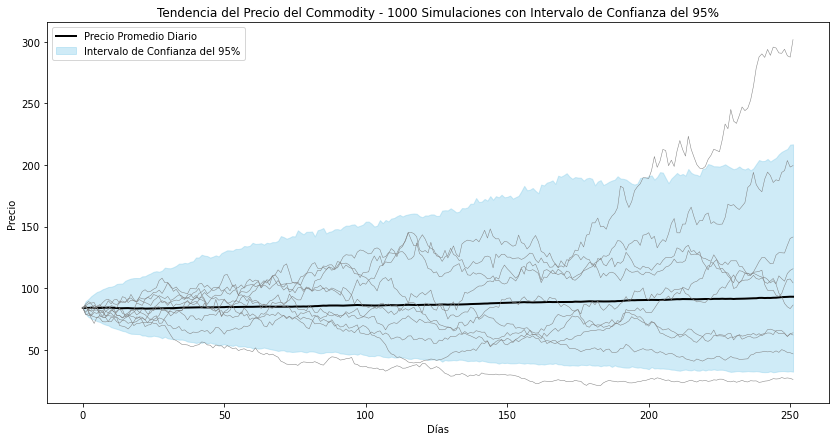

In [53]:
lower_bounds = np.percentile(simulation_results, 2.5, axis=1)
upper_bounds = np.percentile(simulation_results, 97.5, axis=1)

# Graficar el precio promedio diario
plt.figure(figsize=(14, 7))
plt.plot(average_prices, label='Precio Promedio Diario', color='black', lw=2)

# Rellenar el intervalo de confianza del 95%
plt.fill_between(range(num_days), lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Intervalo de Confianza del 95%')

# Opcionalmente, mostrar algunas simulaciones individuales
for i in range(num_simulations):
    if i % 100 == 0:  # Graficar cada 100 simulaciones para reducir el desorden
        plt.plot(simulation_results[:, i], color='grey', lw=0.5, alpha=1)

plt.title('Tendencia del Precio del Commodity - 1000 Simulaciones con Intervalo de Confianza del 95%')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [50]:
lower_bound = np.percentile(simulation_results[-1, :], 2.5)
upper_bound = np.percentile(simulation_results[-1, :], 97.5)

print(f"El intervalo de confianza del 95% para el precio en el día 252 está entre {lower_bound:.2f} y {upper_bound:.2f}.")

El intervalo de confianza del 95% para el precio en el día 252 está entre 32.31 y 216.70.
